In [7]:
import requests
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
from urllib.request import urlopen
from konlpy.tag import Kkma, Komoran, Okt
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

In [8]:
# 한글 글꼴
if(platform.system() == 'Windows'):
    plt.rc('font', family = 'Malgun Gothic')

else:
    plt.rc('font', family = 'AppleGothic')

In [28]:
lyrics_list = []
name_list = []
title_list = []
category_list = []
time_list = []
for n in range(0,10):
    headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36'}
    data = requests.get('https://www.genie.co.kr/chart/musicHistory?year=200{}&category=0'.format(n) ,headers=headers)
    bs = BeautifulSoup(data.text, 'html.parser')
    
    bs1 = bs.find('tbody')
    codeNum_list = []
    for i in range(0,50):
        codeNum_list.append(bs1.find_all('tr')[i].attrs['songid'])
        
    url = 'https://www.genie.co.kr/detail/songInfo?xgnm='

    
    for codeNum in codeNum_list:
    
        headers1 = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36'}
        data1 = requests.get(url+codeNum,headers=headers)
        info_bs = BeautifulSoup(data1.text, 'html.parser')
        
        lyrics_list.append(info_bs.find('pre').find('p').text.replace('\r','').replace('\t','').replace('\n\n','\n').replace('\n',' '))
        time_list.append(info_bs.find_all('span', {'class':'value'})[3].text)


In [29]:
data = {'가사':lyrics_list, '재생시간':time_list}

In [30]:
df = pd.DataFrame(data)
df

,가사,재생시간
0,아시나요 얼마나 사랑했는지 그댈 보면 자꾸 눈물이 나서 차마 그대 바라 보지 못하고...,05:25
1,미안해 난 니가 싫어 졌어 우리 이만 헤어져 다른 여자가 생겼어 너보다 훨씬 좋은...,04:02
2,세상 무서운걸 아무것도 모른다고 말하겠죠 즐거움만 찾는다고 가상 현실 속에 의미...,03:59
3,벌써 며칠째야 애만 태우는게 날 사랑한단 한 마디 말조차 하지 못한 채 용기가 없는...,03:46
4,그대여 뭘 망설이나요 그대 원하고 있죠 눈 앞에 있는 날 알아요 그대 뭘 원하는지...,03:30
...,...,...
495,늘 혼자 사랑하고 혼자 이별하고 늘 혼자 추억하고 혼자 무너지고 사랑이란 놈 그놈 ...,04:31
496,만나지 말잔 내 말 연락도 말란 내 말 너 진짜 그대로 할거니 그게 아닌데 이대로 ...,03:39
497,난 난 난 너 없으면 난 난 난 너 아니면 난 난 난 살 수 없잖아 아직도 설레어 ...,03:13
498,왜 자꾸 두근두근대죠 이 내 가슴이 (자꾸만) 터질거같죠 (자꾸만) 왜 자꾸 숨이...,04:05


In [31]:
df2000 = df.iloc[:50,:]           # 연도별 데이터 저장
df2001 = df.iloc[50:100,:]
df2002 = df.iloc[100:150,:]
df2003 = df.iloc[150:200,:]
df2004 = df.iloc[200:250,:]
df2005 = df.iloc[250:300,:]
df2006 = df.iloc[300:350,:]
df2007 = df.iloc[350:400,:]
df2008 = df.iloc[400:450,:]
df2009 = df.iloc[450:500,:]
genre_df_list = [df2000,df2001,df2002,df2003,df2004,df2005,df2006,df2007,df2008,df2009]

In [36]:
df_list = df['재생시간'].to_list
df_list

<bound method IndexOpsMixin.tolist of 0      05:25
1      04:02
2      03:59
3      03:46
4      03:30
       ...  
495    04:31
496    03:39
497    03:13
498    04:05
499    03:38
Name: 재생시간, Length: 500, dtype: object>

In [35]:
df_list.split(':')

AttributeError: 'function' object has no attribute 'split'

In [ ]:
get_rid_lst=['나', '너', '내','네', '난','넌', '날', '널', '넌', '젠','있다', '없다','하다']   
    # tag가 명사이거나 형용사인 단어들만 noun_adj_list에 넣어줌
    for word, tag in sentences_tag:
        if tag in ['Noun' ,'Verb' ,'Adjective'] and word not in get_rid_lst and len(word)>1:
            # print(tag, '----------', word)
            noun_adj_list.append(word)

In [11]:
okt = Okt()

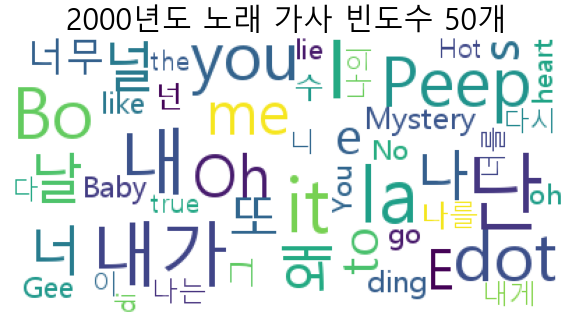

[('난', 171), ('I', 164), ('la', 144), ('it', 142), ('내', 119), ('내가', 115), ('Bo', 114), ('Peep', 110), ('dot', 105), ('you', 100), ('me', 83), ('Oh', 81), ('널', 74), ('날', 73), ('왜', 71), ('너', 70), ('s', 69), ('나', 69), ('E', 69), ('e', 63), ('to', 62), ('또', 59), ('너무', 57), ('Mystery', 56), ('그', 55), ('Gee', 52), ('ding', 52), ('넌', 51), ('like', 50), ('Baby', 49), ('수', 47), ('나를', 47), ('니', 44), ('다시', 44), ('나는', 43), ('내게', 43), ('No', 42), ('나의', 42), ('다', 42), ('You', 42), ('go', 41), ('heart', 41), ('lie', 40), ('oh', 39), ('이', 39), ('di', 37), ('Hot', 37), ('true', 37), ('너를', 36), ('the', 36)]


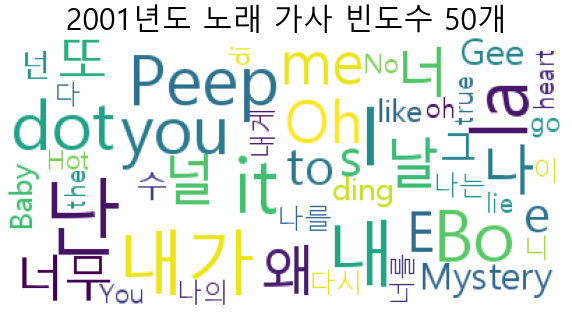

[('난', 171), ('I', 164), ('la', 144), ('it', 142), ('내', 119), ('내가', 115), ('Bo', 114), ('Peep', 110), ('dot', 105), ('you', 100), ('me', 83), ('Oh', 81), ('널', 74), ('날', 73), ('왜', 71), ('너', 70), ('s', 69), ('나', 69), ('E', 69), ('e', 63), ('to', 62), ('또', 59), ('너무', 57), ('Mystery', 56), ('그', 55), ('Gee', 52), ('ding', 52), ('넌', 51), ('like', 50), ('Baby', 49), ('수', 47), ('나를', 47), ('니', 44), ('다시', 44), ('나는', 43), ('내게', 43), ('No', 42), ('나의', 42), ('다', 42), ('You', 42), ('go', 41), ('heart', 41), ('lie', 40), ('oh', 39), ('이', 39), ('di', 37), ('Hot', 37), ('true', 37), ('너를', 36), ('the', 36)]


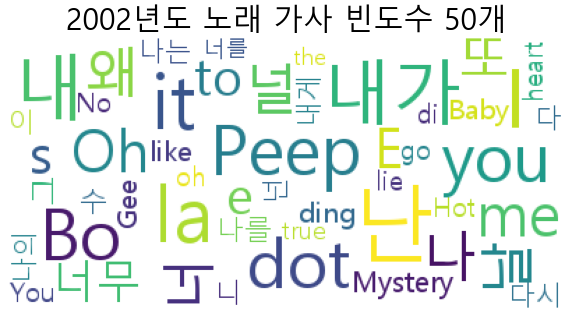

[('난', 171), ('I', 164), ('la', 144), ('it', 142), ('내', 119), ('내가', 115), ('Bo', 114), ('Peep', 110), ('dot', 105), ('you', 100), ('me', 83), ('Oh', 81), ('널', 74), ('날', 73), ('왜', 71), ('너', 70), ('s', 69), ('나', 69), ('E', 69), ('e', 63), ('to', 62), ('또', 59), ('너무', 57), ('Mystery', 56), ('그', 55), ('Gee', 52), ('ding', 52), ('넌', 51), ('like', 50), ('Baby', 49), ('수', 47), ('나를', 47), ('니', 44), ('다시', 44), ('나는', 43), ('내게', 43), ('No', 42), ('나의', 42), ('다', 42), ('You', 42), ('go', 41), ('heart', 41), ('lie', 40), ('oh', 39), ('이', 39), ('di', 37), ('Hot', 37), ('true', 37), ('너를', 36), ('the', 36)]


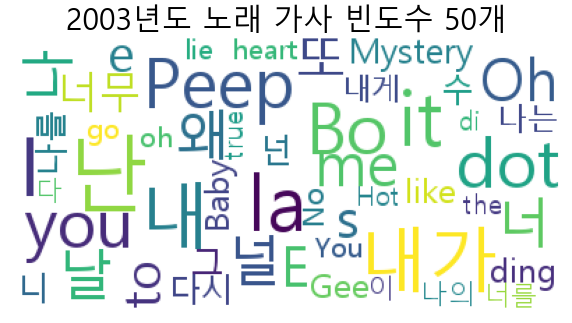

[('난', 171), ('I', 164), ('la', 144), ('it', 142), ('내', 119), ('내가', 115), ('Bo', 114), ('Peep', 110), ('dot', 105), ('you', 100), ('me', 83), ('Oh', 81), ('널', 74), ('날', 73), ('왜', 71), ('너', 70), ('s', 69), ('나', 69), ('E', 69), ('e', 63), ('to', 62), ('또', 59), ('너무', 57), ('Mystery', 56), ('그', 55), ('Gee', 52), ('ding', 52), ('넌', 51), ('like', 50), ('Baby', 49), ('수', 47), ('나를', 47), ('니', 44), ('다시', 44), ('나는', 43), ('내게', 43), ('No', 42), ('나의', 42), ('다', 42), ('You', 42), ('go', 41), ('heart', 41), ('lie', 40), ('oh', 39), ('이', 39), ('di', 37), ('Hot', 37), ('true', 37), ('너를', 36), ('the', 36)]


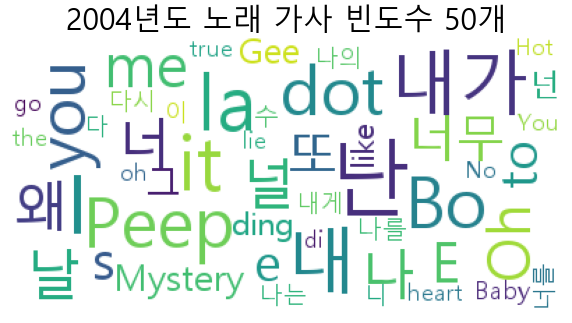

[('난', 171), ('I', 164), ('la', 144), ('it', 142), ('내', 119), ('내가', 115), ('Bo', 114), ('Peep', 110), ('dot', 105), ('you', 100), ('me', 83), ('Oh', 81), ('널', 74), ('날', 73), ('왜', 71), ('너', 70), ('s', 69), ('나', 69), ('E', 69), ('e', 63), ('to', 62), ('또', 59), ('너무', 57), ('Mystery', 56), ('그', 55), ('Gee', 52), ('ding', 52), ('넌', 51), ('like', 50), ('Baby', 49), ('수', 47), ('나를', 47), ('니', 44), ('다시', 44), ('나는', 43), ('내게', 43), ('No', 42), ('나의', 42), ('다', 42), ('You', 42), ('go', 41), ('heart', 41), ('lie', 40), ('oh', 39), ('이', 39), ('di', 37), ('Hot', 37), ('true', 37), ('너를', 36), ('the', 36)]


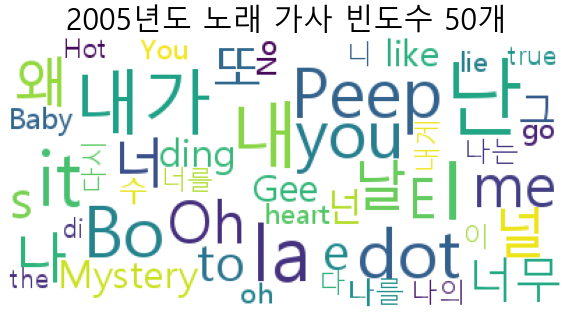

[('난', 171), ('I', 164), ('la', 144), ('it', 142), ('내', 119), ('내가', 115), ('Bo', 114), ('Peep', 110), ('dot', 105), ('you', 100), ('me', 83), ('Oh', 81), ('널', 74), ('날', 73), ('왜', 71), ('너', 70), ('s', 69), ('나', 69), ('E', 69), ('e', 63), ('to', 62), ('또', 59), ('너무', 57), ('Mystery', 56), ('그', 55), ('Gee', 52), ('ding', 52), ('넌', 51), ('like', 50), ('Baby', 49), ('수', 47), ('나를', 47), ('니', 44), ('다시', 44), ('나는', 43), ('내게', 43), ('No', 42), ('나의', 42), ('다', 42), ('You', 42), ('go', 41), ('heart', 41), ('lie', 40), ('oh', 39), ('이', 39), ('di', 37), ('Hot', 37), ('true', 37), ('너를', 36), ('the', 36)]


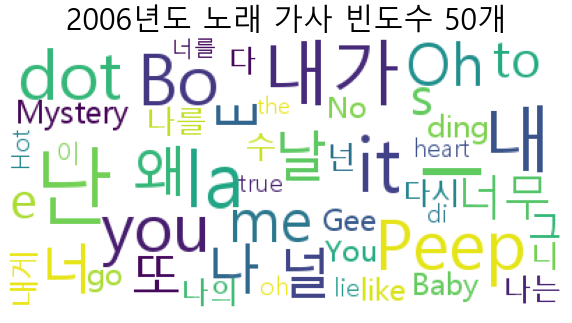

[('난', 171), ('I', 164), ('la', 144), ('it', 142), ('내', 119), ('내가', 115), ('Bo', 114), ('Peep', 110), ('dot', 105), ('you', 100), ('me', 83), ('Oh', 81), ('널', 74), ('날', 73), ('왜', 71), ('너', 70), ('s', 69), ('나', 69), ('E', 69), ('e', 63), ('to', 62), ('또', 59), ('너무', 57), ('Mystery', 56), ('그', 55), ('Gee', 52), ('ding', 52), ('넌', 51), ('like', 50), ('Baby', 49), ('수', 47), ('나를', 47), ('니', 44), ('다시', 44), ('나는', 43), ('내게', 43), ('No', 42), ('나의', 42), ('다', 42), ('You', 42), ('go', 41), ('heart', 41), ('lie', 40), ('oh', 39), ('이', 39), ('di', 37), ('Hot', 37), ('true', 37), ('너를', 36), ('the', 36)]


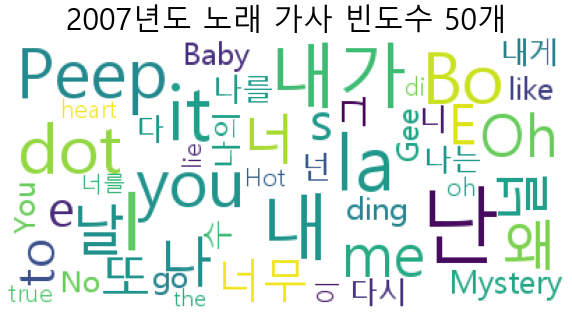

[('난', 171), ('I', 164), ('la', 144), ('it', 142), ('내', 119), ('내가', 115), ('Bo', 114), ('Peep', 110), ('dot', 105), ('you', 100), ('me', 83), ('Oh', 81), ('널', 74), ('날', 73), ('왜', 71), ('너', 70), ('s', 69), ('나', 69), ('E', 69), ('e', 63), ('to', 62), ('또', 59), ('너무', 57), ('Mystery', 56), ('그', 55), ('Gee', 52), ('ding', 52), ('넌', 51), ('like', 50), ('Baby', 49), ('수', 47), ('나를', 47), ('니', 44), ('다시', 44), ('나는', 43), ('내게', 43), ('No', 42), ('나의', 42), ('다', 42), ('You', 42), ('go', 41), ('heart', 41), ('lie', 40), ('oh', 39), ('이', 39), ('di', 37), ('Hot', 37), ('true', 37), ('너를', 36), ('the', 36)]


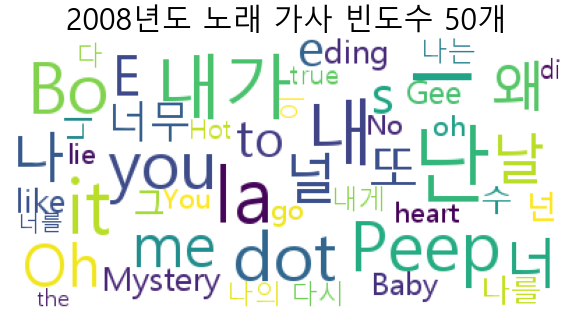

[('난', 171), ('I', 164), ('la', 144), ('it', 142), ('내', 119), ('내가', 115), ('Bo', 114), ('Peep', 110), ('dot', 105), ('you', 100), ('me', 83), ('Oh', 81), ('널', 74), ('날', 73), ('왜', 71), ('너', 70), ('s', 69), ('나', 69), ('E', 69), ('e', 63), ('to', 62), ('또', 59), ('너무', 57), ('Mystery', 56), ('그', 55), ('Gee', 52), ('ding', 52), ('넌', 51), ('like', 50), ('Baby', 49), ('수', 47), ('나를', 47), ('니', 44), ('다시', 44), ('나는', 43), ('내게', 43), ('No', 42), ('나의', 42), ('다', 42), ('You', 42), ('go', 41), ('heart', 41), ('lie', 40), ('oh', 39), ('이', 39), ('di', 37), ('Hot', 37), ('true', 37), ('너를', 36), ('the', 36)]


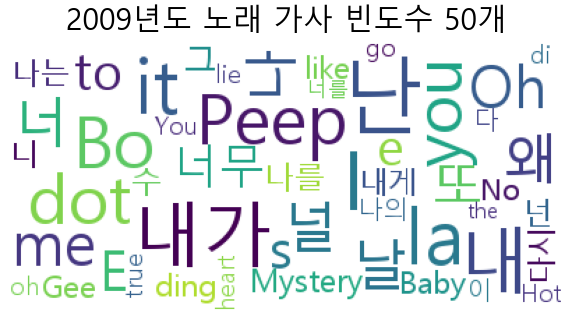

[('난', 171), ('I', 164), ('la', 144), ('it', 142), ('내', 119), ('내가', 115), ('Bo', 114), ('Peep', 110), ('dot', 105), ('you', 100), ('me', 83), ('Oh', 81), ('널', 74), ('날', 73), ('왜', 71), ('너', 70), ('s', 69), ('나', 69), ('E', 69), ('e', 63), ('to', 62), ('또', 59), ('너무', 57), ('Mystery', 56), ('그', 55), ('Gee', 52), ('ding', 52), ('넌', 51), ('like', 50), ('Baby', 49), ('수', 47), ('나를', 47), ('니', 44), ('다시', 44), ('나는', 43), ('내게', 43), ('No', 42), ('나의', 42), ('다', 42), ('You', 42), ('go', 41), ('heart', 41), ('lie', 40), ('oh', 39), ('이', 39), ('di', 37), ('Hot', 37), ('true', 37), ('너를', 36), ('the', 36)]


In [22]:
for i in range(0,10):
    noun_adj_list = []
    lyrics_str = str(lyrics_list[0+(i*50):50+(i*50)])
    sentences_tag = okt.pos(lyrics_str)
    result = []
    for gasa in lyrics_list:  # 50곡의 가사를 처음부터 한곡씩 꺼내어서 작업한다.
        # 특수문자 제거
        special_chr = ["‘", "’", "!",  ",", ".", "(", ")", "?", "&", "'", "\”", "\"", "~"]
        for char in special_chr:
            gasa = gasa.replace( char, " " )

        # 공백을 기준으로 문자열 나누기
        temp = gasa.split( " " )    # 공백으로 나누기
        for _str in temp:   # 반복문을 이용하여서 단어 하나씩 꺼내어 본다.
            if _str != "":  # 공백("")이 아닐 경우에만 해당 조건문을 수행한다.
                result.append( _str )    # 최종적으로 result 변수에 분류된 가사들을 넣는다.
    for word, tag in sentences_tag:
        if tag in ['Noun' , 'Adjective']:
            noun_adj_list.append(word)
        
        
    counts = Counter(result)
    tags = counts.most_common(50)
    
    if platform.system() == 'Windows':
        path = r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system() == 'Darwin': # Mac OS
        path = r'/System/Library/Fonts/AppleGothic'
    else:
        path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'
    
    wc = WordCloud(font_path=path, background_color="white", max_font_size=60)
    cloud = wc.generate_from_frequencies(dict(tags))
    # 생성된 WordCloud를 test.jpg로 보낸다.
    #cloud.to_file('test.jpg')
    plt.figure(figsize=(10, 8))
    plt.title(f'{2000+i}년도 노래 가사 빈도수 50개', fontsize = 30)
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()
    
    print(tags)
    